In [21]:
import pandas as pd
import plotly.express as px
import re
import string
import nltk
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords




In [6]:
train_df = pd.read_csv('Genre Classification Dataset/train_data.txt', sep=' ::: ', engine='python', names=['id','Title', 'Genre', 'Description'])  
train_df.head()


,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [7]:
train_df['Genre'].value_counts()

Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [9]:
train_df.describe()

,id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [10]:
train_df.dropna()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [11]:
train_df.dropna()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [12]:
train_df.shape

(54214, 4)

In [13]:
test_df = pd.read_csv('Genre Classification Dataset/train_data.txt', sep=':::', names=['Title', 'Description'], engine='python')
test_df.head()

,,Title,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 54214 entries, (1, ' Oscar et la dame rose (2009) ') to (54214, " Nature's Fury: Storm of the Century (2006) ")
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Description  54214 non-null  object
dtypes: object(2)
memory usage: 6.1+ MB


In [15]:
test_df.dropna()

,,Title,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [16]:
test_df.shape

(54214, 2)

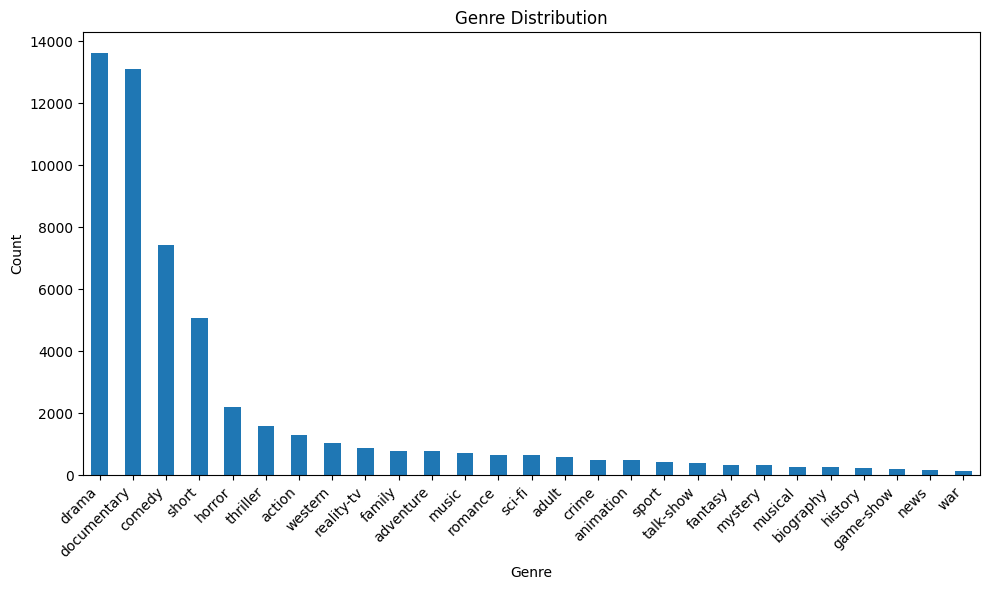

In [17]:
plt.figure(figsize=(10, 6))
genre_counts = train_df["Genre"].value_counts()
genre_counts.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

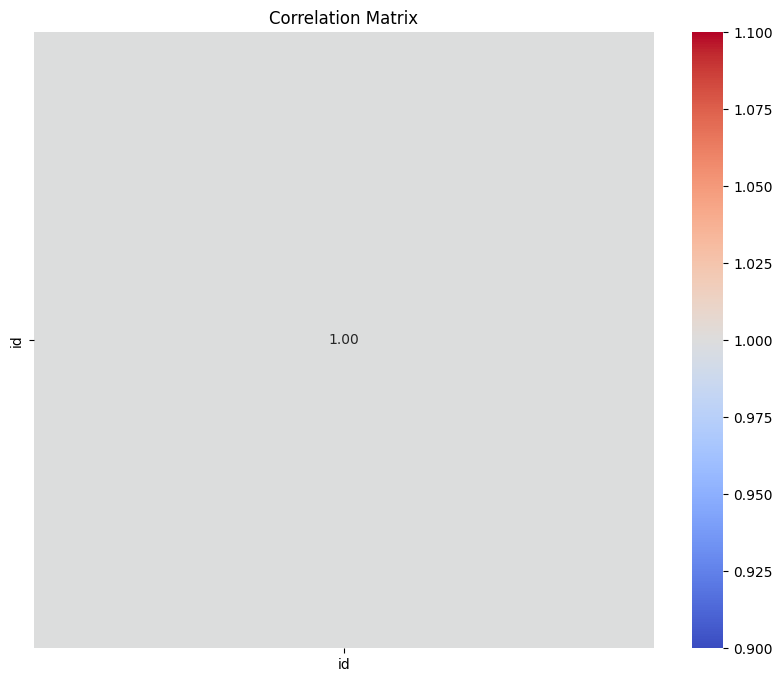

In [ ]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

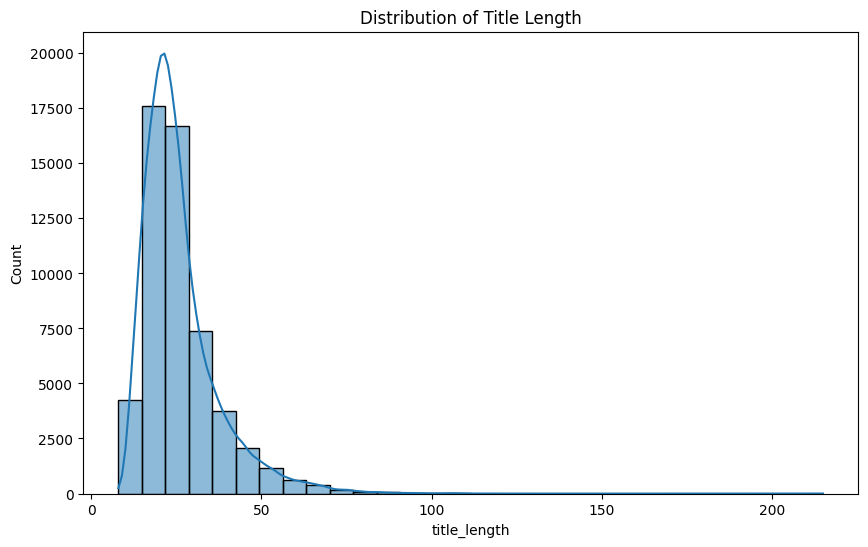

In [ ]:
train_df['title_length'] = train_df['title'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='title_length', bins=30, kde=True)
plt.title('Distribution of Title Length')
plt.show()

In [ ]:
data = data.dropna()
corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

data["embeddings"] = data["Description"].apply(get_sentence_embedding)
X = pd.DataFrame(data["embeddings"].to_list())

label_encoder = LabelEncoder()
data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
y = data["genre_encoded"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)

print("Precision ->", precision)
print("Recall ->", recall)
print("Accuracy ->", accuracy)


print(classification_report(y_test, predictions))


confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion_mat)

Precision: 0.43733177449487615
Recall: 0.484921147283962
Accuracy: 0.484921147283962
              precision    recall  f1-score   support

           0       0.37      0.03      0.05       277
           1       0.00      0.00      0.00       125
           2       0.00      0.00      0.00       141
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00        46
           5       0.37      0.38      0.38      1469
           6       1.00      0.01      0.02       103
           7       0.56      0.88      0.69      2619
           8       0.45      0.77      0.57      2764
           9       1.00      0.01      0.03       151
          10       0.00      0.00      0.00        54
          11       0.79      0.44      0.56        25
          12       0.00      0.00      0.00        46
          13       0.46      0.11      0.18       468
          14       0.47      0.17      0.25       128
          15       0.00      0.00      0.00       

c:\Users\navne\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\navne\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\navne\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

In [25]:
combined_data = pd.concat([train_df, test_df], ignore_index=True)
data = combined_data
data = data.dropna()
corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

data["embeddings"] = data["Description"].apply(get_sentence_embedding)
X = pd.DataFrame(data["embeddings"].to_list())

label_encoder = LabelEncoder()
data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
y = data["genre_encoded"]

C:\Users\navne\AppData\Local\Temp\ipykernel_26324\3741310536.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["embeddings"] = data["Description"].apply(get_sentence_embedding)
C:\Users\navne\AppData\Local\Temp\ipykernel_26324\3741310536.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])


In [27]:

def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

def train_model():
    train_data = pd.read_csv("Genre Classification Dataset/train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
    test_data = pd.read_csv("Genre Classification Dataset/test_data.txt", sep=':::', names=['Title', 'Description'], engine='python')
    combined_data = pd.concat([train_data, test_data], ignore_index=True)
    data = combined_data
    data = data.dropna()
    corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
    word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)


    def get_sentence_embedding(sentence):
        words = re.findall(r'\w+', sentence.lower())
        vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        return sum(vectors) / len(vectors) if vectors else [0] * 100

    data["embeddings"] = data["Description"].apply(get_sentence_embedding)
    X = pd.DataFrame(data["embeddings"].to_list())
    label_encoder = LabelEncoder()
    data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
    y = data["genre_encoded"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model, label_encoder

def predict_genre(model, label_encoder, new_descriptions):
    new_embeddings = [get_sentence_embedding(desc) for desc in new_descriptions]
    new_X = pd.DataFrame(new_embeddings)
    new_predictions = model.predict(new_X)
    predicted_genres = label_encoder.inverse_transform(new_predictions)

    return predicted_genres

trained_model, genre_label_encoder = train_model()

new_descriptions = ["detective solving case regarding crime","a story of king and queen ","a story surrounding a man and his life around a girl"]


predicted_genres = predict_genre(trained_model, genre_label_encoder, new_descriptions)

for desc, genre in zip(new_descriptions, predicted_genres):
    print(f"Description: {desc}")
    print(f"Predicted Genre: {genre}")
    print()

C:\Users\navne\AppData\Local\Temp\ipykernel_26324\2652175081.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["embeddings"] = data["Description"].apply(get_sentence_embedding)
C:\Users\navne\AppData\Local\Temp\ipykernel_26324\2652175081.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])


Description: detective solving case regarding crime
Predicted Genre:  drama 

Description: a story of king and queen 
Predicted Genre:  drama 

Description: a story surrounding a man and his life around a girl
Predicted Genre:  short 

